In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [3]:
#특정 행 추가
tipdf.loc['2502020']=np.nan
tipdf.tail(2)

,total_bill,tip,sex,smoker,day,time,size
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN
2502020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#tipdf의 차원을 조회
tipdf.ndim
np.ndim(tipdf)

2

In [7]:
#tipdf의 크기 조회(행,열) -> 튜플로 조회
tipdf.shape
np.shape(tipdf)

(246, 7)

In [8]:
#tipdf의 데이터 조회
tipdf.head() #앞에서 5개
tipdf.tail() #하위 5개
tipdf.info() #컬럼에대한 상세정보
tipdf.columns #columns에 대한 정보

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 2502020
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [10]:
#가장 팁이 높은 데이터 상위 5개 출력
tipdf.sort_values(by='tip',ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


In [11]:
def get_tippct(df):
    return round(df['tip']/df['total_bill']*100,1)

In [13]:
# tip_pct를 구해서 tippct라는 컬럼 추가
# 함수로 구한 값을 컬럼의 값으로 지정
tipdf['tip_pct'] = get_tippct(tipdf)
tipdf

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
...,...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.8
243,18.78,3.00,Female,No,Thur,Dinner,2.0,16.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


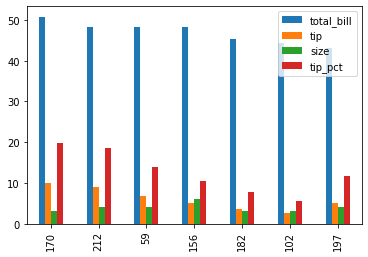

In [18]:
tipdf.sort_values(by=['total_bill','tip_pct'],ascending=[False,False]).head(7).plot(kind='bar')
plt.show()

In [29]:
#male의 정보를 따로 분리해서 tipdf_man이라는 데이터프레임을 만들기
tipdf_man = tipdf[tipdf['sex']=='Male']
tipdf_man

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0,18.6
6,8.77,2.00,Male,No,Sun,Dinner,2.0,22.8
...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2.0,7.9
237,32.83,1.17,Male,Yes,Sat,Dinner,2.0,3.6
239,29.03,5.92,Male,No,Sat,Dinner,3.0,20.4
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8


In [30]:
tipdf_woman = tipdf[tipdf['sex']=='Female']
tipdf_woman

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4


In [34]:
tipdf['sex'].unique()
# tipdf[tipdf['sex'].isin('Female')] isin은 리스트 형태로만 가능하다.
tipdf[tipdf['sex'].isin(['Female'])]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4


In [36]:
#두개의 데이터프레임을 병합해서 tip_all df생성
tip_all = pd.concat([tipdf_woman,tipdf_man],keys=['Woman','Man'])
tip_all

total_bill   tip     sex smoker  day    time  size  tip_pct
Woman 0         16.99  1.01  Female     No  Sun  Dinner   2.0      5.9
      4         24.59  3.61  Female     No  Sun  Dinner   4.0     14.7
      11        35.26  5.00  Female     No  Sun  Dinner   4.0     14.2
      14        14.83  3.02  Female     No  Sun  Dinner   2.0     20.4
      16        10.33  1.67  Female     No  Sun  Dinner   3.0     16.2
...               ...   ...     ...    ...  ...     ...   ...      ...
Man   236       12.60  1.00    Male    Yes  Sat  Dinner   2.0      7.9
      237       32.83  1.17    Male    Yes  Sat  Dinner   2.0      3.6
      239       29.03  5.92    Male     No  Sat  Dinner   3.0     20.4
      241       22.67  2.00    Male    Yes  Sat  Dinner   2.0      8.8
      242       17.82  1.75    Male     No  Sat  Dinner   2.0      9.8

[244 rows x 8 columns]

In [43]:
# tip_all.loc['2020'] = np.nan
tip_all.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Man, 237)",32.83,1.17,Male,Yes,Sat,Dinner,2.0,3.6
"(Man, 239)",29.03,5.92,Male,No,Sat,Dinner,3.0,20.4
"(Man, 241)",22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8
"(Man, 242)",17.82,1.75,Male,No,Sat,Dinner,2.0,9.8
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#row별 na값의 갯수
tip_all.isnull().sum(axis=1) #sum(1)로 해도 axis=1한거와 같음
tip_all.isna().sum(axis=1)
tip_all.isna().count(axis=1)

(Woman, 0)     8
(Woman, 4)     8
(Woman, 11)    8
(Woman, 14)    8
(Woman, 16)    8
              ..
(Man, 237)     8
(Man, 239)     8
(Man, 241)     8
(Man, 242)     8
2020           8
Length: 245, dtype: int64

In [49]:
tip_all.dropna(how='any',inplace=True)
tip_all

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Woman, 0)",16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
"(Woman, 4)",24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
"(Woman, 11)",35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
"(Woman, 14)",14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
"(Woman, 16)",10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
...,...,...,...,...,...,...,...,...
"(Man, 236)",12.60,1.00,Male,Yes,Sat,Dinner,2.0,7.9
"(Man, 237)",32.83,1.17,Male,Yes,Sat,Dinner,2.0,3.6
"(Man, 239)",29.03,5.92,Male,No,Sat,Dinner,3.0,20.4
"(Man, 241)",22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8


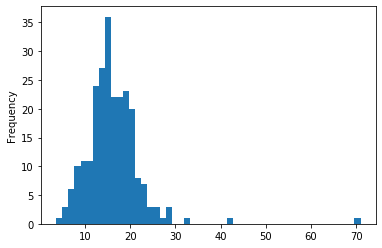

In [52]:
tipdf['tip_pct'].plot(kind='hist',bins=50)
plt.show()